In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline

In [17]:
stopword = set(stopwords.words('english'))

df = pd.read_csv('appendix.csv', parse_dates = True)

df.head(1)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68


In [7]:
df['Launch Date'] = pd.to_datetime(df['Launch Date'])
df['Year'] = df['Launch Date'].dt.year

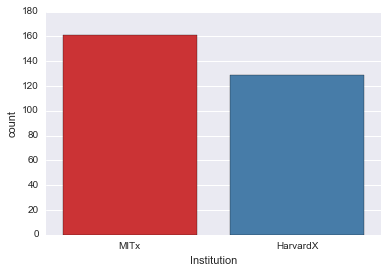

In [8]:
plt.figure()
sns.countplot(x = 'Institution', data = df, palette = 'Set1')

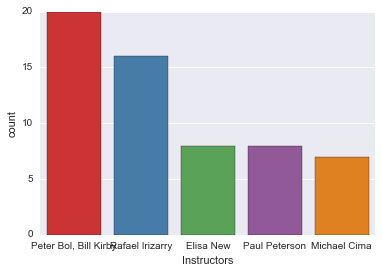

In [9]:
plt.figure()
sns.countplot(x = 'Instructors', data = df, order = df.Instructors.value_counts().iloc[:5].index, palette = 'Set1')

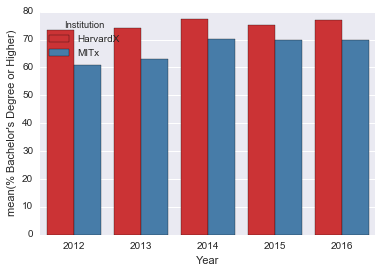

In [10]:
plt.figure()
degree = df.groupby(['Institution', 'Year'])["% Bachelor's Degree or Higher"].mean().reset_index()
sns.barplot(x = "Year", y = "% Bachelor's Degree or Higher", data = degree, hue = 'Institution', palette = 'Set1')

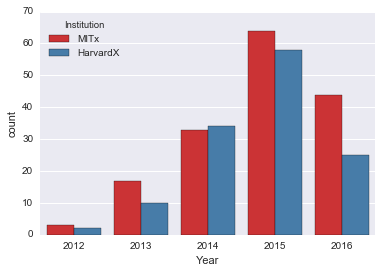

In [11]:
plt.figure()
sns.countplot(x = 'Year', data = df, hue = 'Institution', palette = 'Set1')

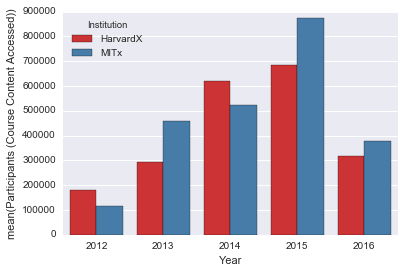

In [12]:
participants = df.groupby(['Institution', 'Year'])["Participants (Course Content Accessed)"].sum().reset_index()
plt.figure()
sns.barplot(x = 'Year', y = "Participants (Course Content Accessed)", data = participants,  hue = 'Institution', palette = 'Set1')

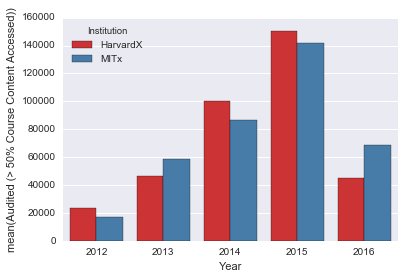

In [13]:
participants = df.groupby(['Institution', 'Year'])["Audited (> 50% Course Content Accessed)"].sum().reset_index()
plt.figure()
sns.barplot(x = 'Year', y = "Audited (> 50% Course Content Accessed)", data = participants,  hue = 'Institution', palette = 'Set1')

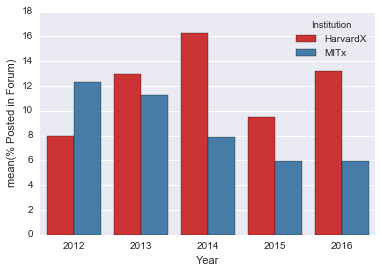

In [14]:
participants = df.groupby(['Institution', 'Year'])["% Posted in Forum"].mean().reset_index()
plt.figure()
sns.barplot(x = 'Year', y = "% Posted in Forum", data = participants,  hue = 'Institution', palette = 'Set1')

(-0.5, 399.5, 199.5, -0.5)

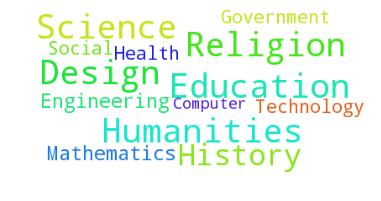

In [15]:
plt.figure()
wc = WordCloud(background_color="white", max_words=15,stopwords=stopword, max_font_size=40, random_state=42).generate(" ".join(df['Course Subject']))
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

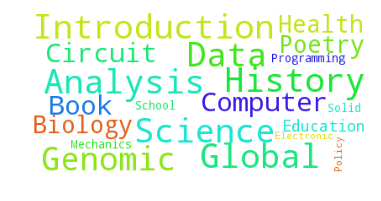

In [16]:
plt.figure()
wc = WordCloud(background_color="white", max_words=20,stopwords=stopword, max_font_size=40, random_state=42).generate(" ".join(df['Course Title']))
plt.imshow(wc)
plt.axis('off')